# First attempt for using PETsys in Dubna Scintillating hodoscope (DuSci)
prototype: two Ketek 8x8 SiPM arrays coupled from the two sides of a 60 cm scintillator

triggers are laser at different intensity 

last edit Oct-29 2020 (EOC)
# I suspect that the main loop has a bug in event - collection. Need to follow more updated DuSi_200cm_scint_cosmic.ipynb

In [24]:
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/analysis/Python'); 
from PETsys_analysis_tools import *;
main_figures_path = '/Users/erezcohen/Desktop/PETsys/write-ups/DuSci/Figures/'
%config InlineBackend.figure_format = 'retina'

In [25]:
def get_all_differences_R_L(t_L,t_R):#{
    # compute time differences between all combinations of t_L and t_R
    mesh = np.array(np.meshgrid(t_R,t_L))
    combinations = mesh.T.reshape(-1, 2)
    dt = np.diff(combinations)
    return dt
#}

In [37]:
LaserCoincDict = dict()
LaserEventsDict = dict();
# laser_attenuation_arr = [5.,9.,12.,15.,18.,20,22.,23.,25,26,27]; # dB
laser_attenuation_arr = [15,20,23,25,30]; # dB

In [39]:
# data_path = '/Users/erezcohen/Desktop/data/PETsys/DuSi/TAU_60cm_scintillator_Oct29_2020/'
dT = 30 # sec
data_path = '/Users/erezcohen/Desktop/data/PETsys/DuSi/TAU_60cm_scintillator_Nov5_2020/' # dT = 60 # sec
for attenuation in laser_attenuation_arr: 
#     LaserCoinc = pd.read_csv(data_path+'laser_rate2kHz_att%ddB_30sec_coinc.dat'%(attenuation),
#     LaserCoinc = pd.read_csv(data_path+'laser_2kHz_att%ddB_%dsec_coinc.dat'%(attenuation,dT),
    LaserCoinc = pd.read_csv(data_path+'laser_1arrayEachSide_2kHz_%ddB_%dsec_coinc.dat'%(attenuation,dT),                                                          
                             delimiter='\t',
                             names=['mh_n1','mh_j1','time1','e1','id1','mh_n2','mh_j2','time2','e2','id2'])
    LaserCoincDict[attenuation] = LaserCoinc;
    print 'done laser attenuation %.1f dB'%attenuation
print 'done.'
# LaserCoincDict[attenuation][0:12]

done laser attenuation 15.0 dB
done laser attenuation 20.0 dB
done laser attenuation 23.0 dB
done laser attenuation 25.0 dB
done laser attenuation 30.0 dB
done.


In [40]:
fdebug = 0
for attenuation in laser_attenuation_arr: 
    print '------------------------------------------------------------------'
    print 'starting to process laser attenuation ' , attenuation , 'dB'
    LaserCoinc = LaserCoincDict[attenuation];
    Nmax = len(LaserCoinc)
    mh_n1,mh_n2 = np.array(LaserCoinc['mh_n1']), np.array(LaserCoinc['mh_n2'])
    time1,time2 = np.array(LaserCoinc['time1']), np.array(LaserCoinc['time2'])
    e1,e2 = np.array(LaserCoinc['e1']),np.array(LaserCoinc['e2'])    
    
    megaevent = 0
    LaserEvents = pd.DataFrame()
    
    print 'processing',Nmax,'lines of coincidence file'
    t_R,t_L,summed_Q = [],[],[]
    N_R,N_L = mh_n1[0], mh_n2[0];     
    N_lines_in_event = N_R + N_L - 1;
    megaevent,i_line_in_event = 0,0;

    for i in np.arange(Nmax): 
        
        if fdebug>0: print 'i:',i,',i_line_in_event:',i_line_in_event

        if i_line_in_event < N_lines_in_event:
            t_R.append(time1[i])
            t_L.append(time2[i])
            summed_Q.append(e1[i]+e2[i])
            i_line_in_event = i_line_in_event + 1
            
        if i_line_in_event >= N_lines_in_event:
            # keep only unique values of t_L and t_R and sort them by time
            dt_all = get_all_differences_R_L(np.unique(t_L),np.unique(t_R));
            LaserEvents = LaserEvents.append(pd.DataFrame({ 'Qtotal':np.sum(summed_Q),
                                                            'Qavg':np.sum(summed_Q)/(len(summed_Q)),
                                                            'mean_dt_all':np.mean(dt_all)
                                                          }, 
                                                            index=[megaevent]), 
                                               ignore_index=True)
            t_R,t_L,summed_Q = [],[],[]                    
            N_R,N_L = mh_n1[i],mh_n2[i]
            N_lines_in_event = N_R + N_L - 1
            i_line_in_event = 0;

        if i%100000==0:  print 100.*float(i)/Nmax,'%'
    print 'done laser attenuation ' , attenuation , 'dB, collected ',len(LaserEvents),' laser events'        
    LaserEventsDict[attenuation] = LaserEvents

print 'done.'
LaserEventsDict[attenuation][0:15]

------------------------------------------------------------------
starting to process laser attenuation  15 dB
processing 7008897 lines of coincidence file
0.0 %
1.42675801913 %
2.85351603826 %
4.28027405739 %
5.70703207652 %
7.13379009565 %
8.56054811477 %
9.9873061339 %
11.414064153 %
12.8408221722 %
14.2675801913 %
15.6943382104 %
17.1210962295 %
18.5478542487 %
19.9746122678 %
21.4013702869 %
22.8281283061 %
24.2548863252 %
25.6816443443 %
27.1084023635 %
28.5351603826 %
29.9619184017 %
31.3886764208 %
32.81543444 %
34.2421924591 %
35.6689504782 %
37.0957084974 %
38.5224665165 %
39.9492245356 %
41.3759825547 %
42.8027405739 %
44.229498593 %
45.6562566121 %
47.0830146313 %
48.5097726504 %
49.9365306695 %
51.3632886886 %
52.7900467078 %
54.2168047269 %
55.643562746 %
57.0703207652 %
58.4970787843 %
59.9238368034 %
61.3505948226 %
62.7773528417 %
64.2041108608 %
65.6308688799 %
67.0576268991 %
68.4843849182 %
69.9111429373 %
71.3379009565 %
72.7646589756 %
74.1914169947 %
75.61817501

,Qavg,Qtotal,mean_dt_all
0,2.005673,18.051055,-1735.666667
1,6.583913,59.255215,-752.444444


## first, monitor basic statistics: rate of measured events in each laser configuration, and average integrated charge

In [41]:
laser_attenuation_arr

[15, 20, 23, 25, 30]

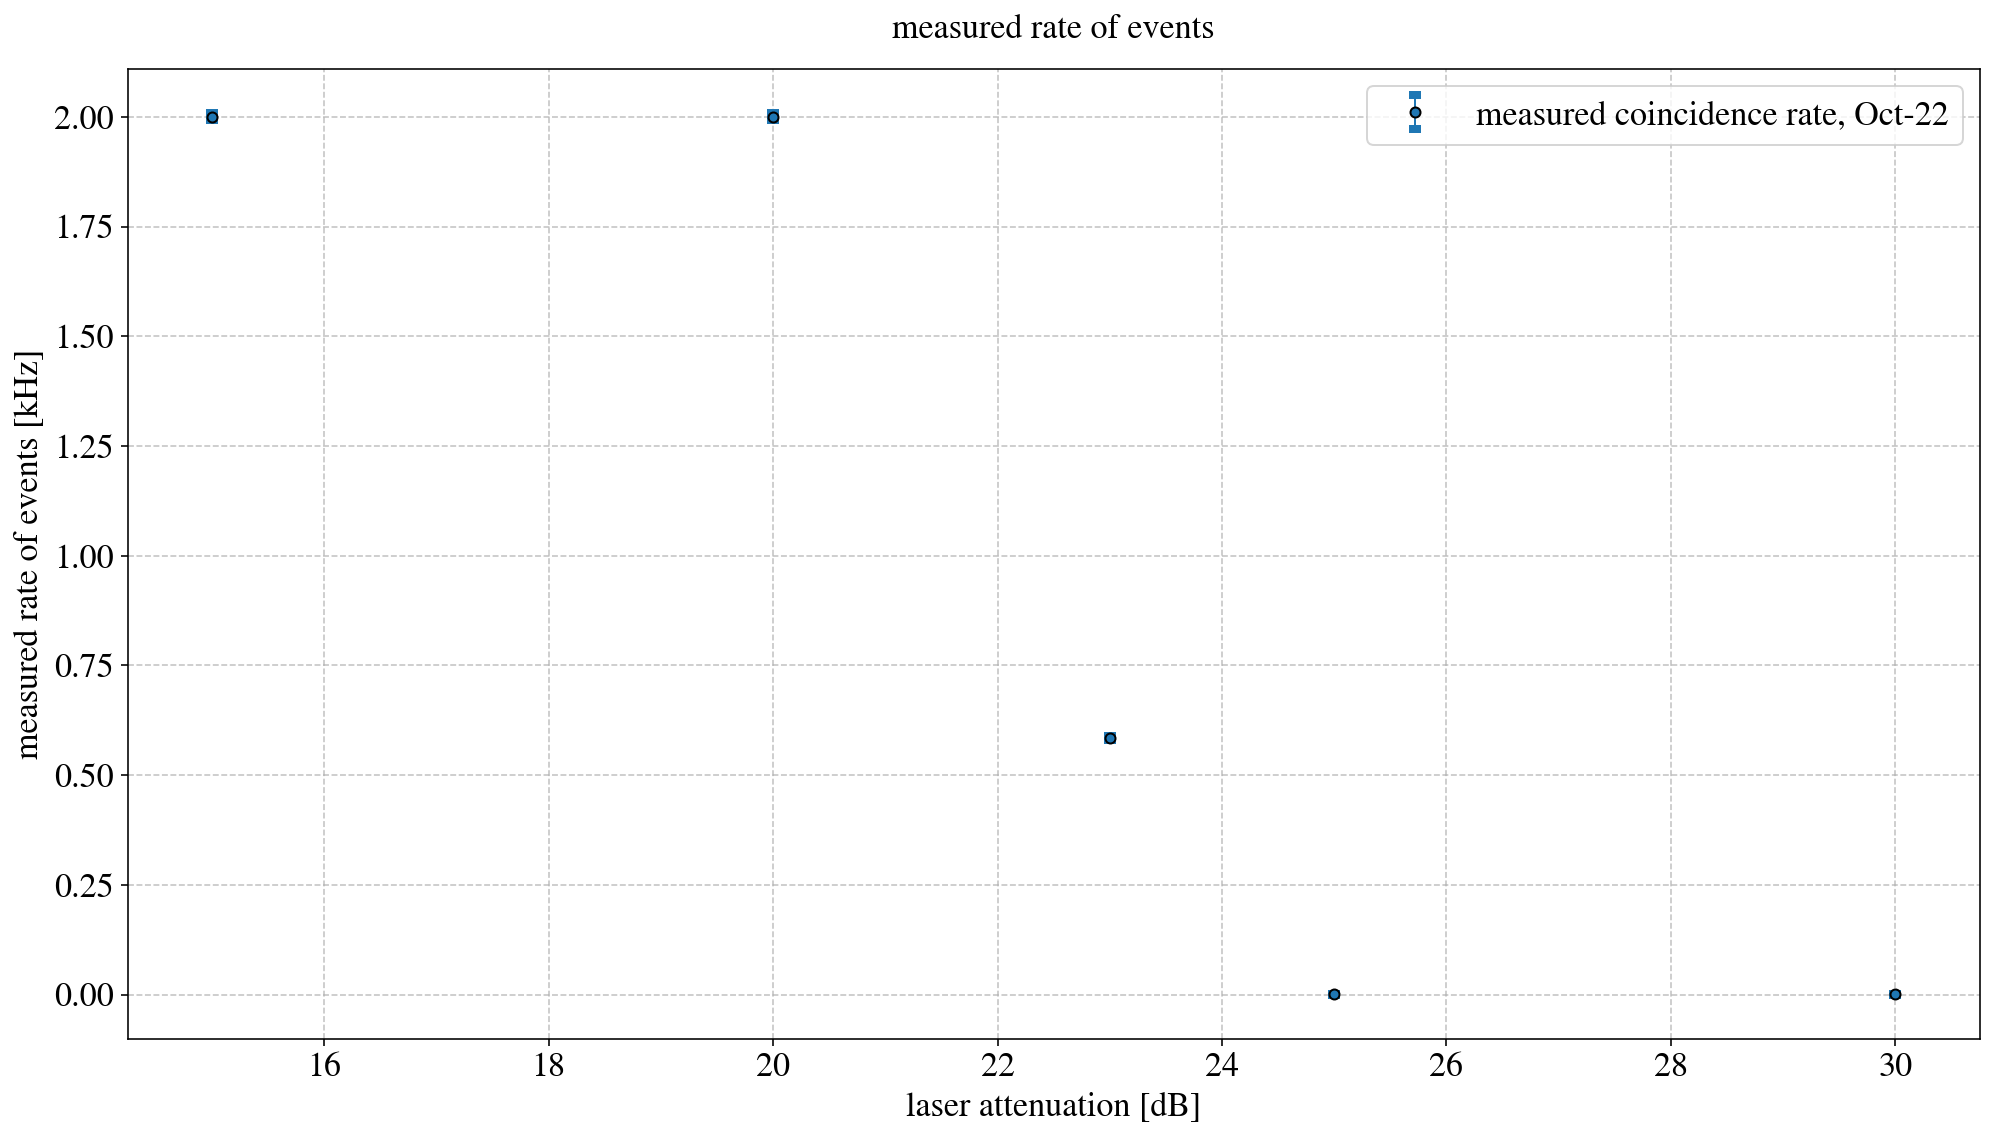

In [42]:
DeltaT = dT #30. # sec
Configured_Rate_kHz = 2.0;
Measured_Rate_kHz,Measured_Rate_kHz_err = [],[]
for attenuation in laser_attenuation_arr: 
    datalabel = '%.1f dB attenuation'%attenuation
    LaserEvents = LaserEventsDict[attenuation]
    Measured_Rate_kHz.append(float(len(LaserEvents))/DeltaT/1000);
    Measured_Rate_kHz_err.append(np.sqrt(float(len(LaserEvents)))/DeltaT/1000);
    
fig=plt.figure(figsize=(14,8));
ax=fig.add_subplot(111)
plt.errorbar(np.array(laser_attenuation_arr),
             np.array(Measured_Rate_kHz),np.array(Measured_Rate_kHz_err),
             markeredgecolor='black',markersize=5,marker='o',linestyle='None',linewidth=1,capthick=4,capsize=3,             
             label='measured coincidence rate, Oct-22');
# plt.plot( laser_attenuation_arr[1:], Configured_Rate_kHz*np.ones(len(laser_attenuation_arr[1:])), '--r',label='configured laser frequency, Oct-22')

# for attenuation in laser_attenuation_arr[1:]: 
#     datalabel = '%.1f dB attenuation'%attenuation
#     LaserEvents = LaserEventsDict[attenuation]
#     Measured_Rate_kHz.append(float(len(LaserEvents))/DeltaT/1000);
#     Measured_Rate_kHz_err.append(np.sqrt(float(len(LaserEvents)))/DeltaT/1000);
    
# fig=plt.figure(figsize=(14,8));
# ax=fig.add_subplot(111)
# # Oct-22 data
# plt.errorbar(np.array(laser_attenuation_arr[1:]),
#              np.array(Measured_Rate_kHz),np.array(Measured_Rate_kHz_err),
#              markeredgecolor='black',markersize=5,marker='o',linestyle='None',linewidth=1,capthick=4,capsize=3,             
#              label='measured coincidence rate, Oct-22');
# plt.plot( laser_attenuation_arr[1:], Configured_Rate_kHz*np.ones(len(laser_attenuation_arr[1:])), '--r',label='configured laser frequency, Oct-22')

# # Oct-15 data
# DeltaT = 30;
# Configured_Rate_kHz = 1.0;
# attenuation = laser_attenuation_arr[0];
# plt.errorbar(np.array(attenuation),
#              np.array(float(len(LaserEventsDict[attenuation]))/DeltaT/1000),np.array(np.sqrt(float(len(LaserEventsDict[attenuation])))/DeltaT/1000),
#              markeredgecolor='black',markersize=5,marker='o',linestyle='None',linewidth=1,capthick=4,capsize=3,             
#              label='measured coincidence rate, Oct-15');
# plt.plot( [0.9*attenuation,1.1*attenuation], Configured_Rate_kHz*np.ones(2), '--k',label='configured laser frequency, Oct-15')


set_axes(ax=ax,x_label='laser attenuation [dB]',y_label='measured rate of events [kHz]',
             title='measured rate of events',
             fontsize=17,do_add_grid=True,do_add_legend=True);
plt.tight_layout()

## number of SiPMs that "fired" in each event

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


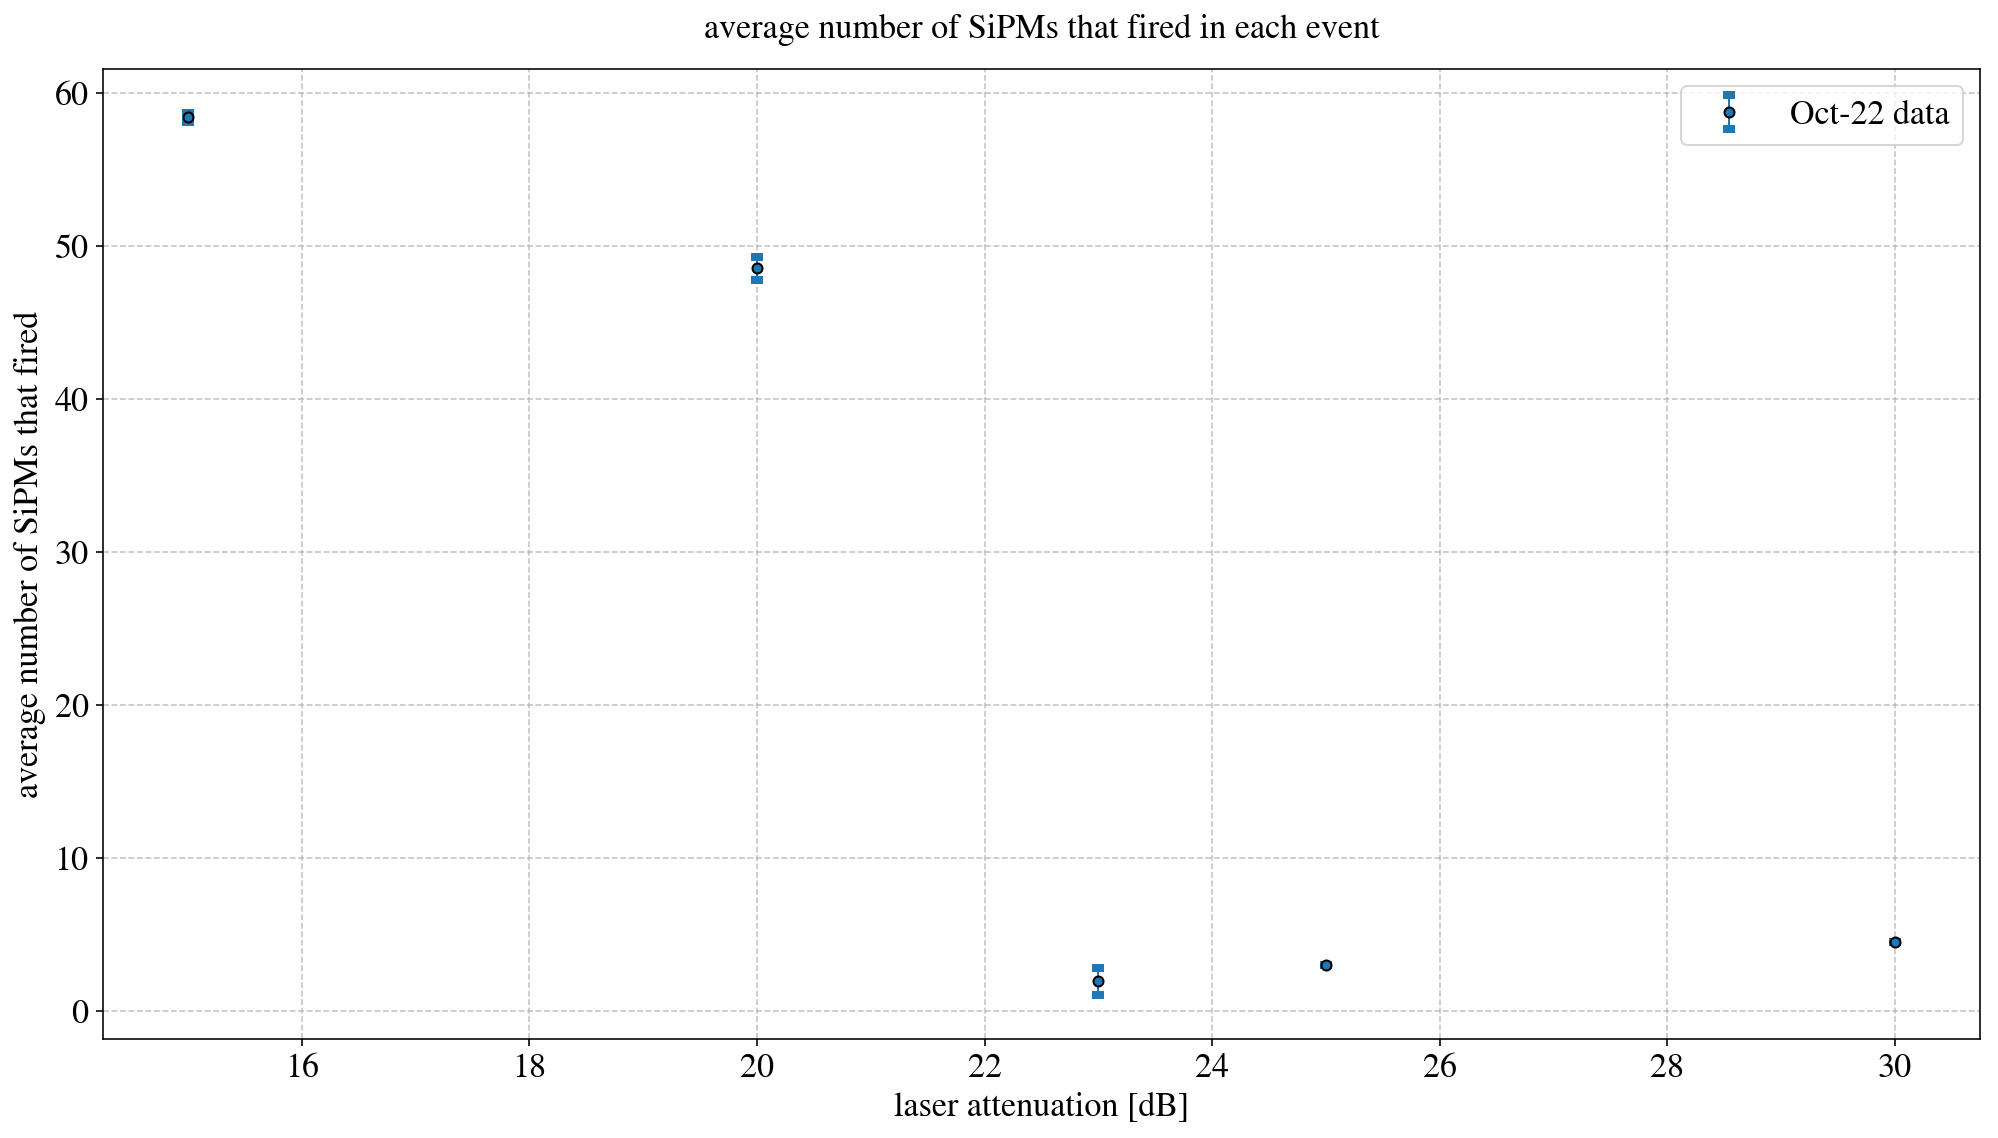

In [43]:
NSiPMs,NSiPMs_err = [],[]
for attenuation in laser_attenuation_arr: 
    datalabel = '%.1f dB attenuation'%attenuation
    LaserEvents = LaserEventsDict[attenuation]
    LaserEvents.NSiPMs = LaserEvents.Qtotal / LaserEvents.Qavg / 2
    NSiPMs.append( np.mean(LaserEvents.NSiPMs) )
    NSiPMs_err.append( np.std(LaserEvents.NSiPMs) )

NSiPMs_err_up = NSiPMs_err
# limit up err to 64
for i in range(len(NSiPMs_err)):
    if NSiPMs_err[i]+NSiPMs[i] > 64:
        NSiPMs_err_up[i] = 64 - NSiPMs[i]
    
fig=plt.figure(figsize=(14,8));
ax=fig.add_subplot(111)
plt.errorbar(np.array(laser_attenuation_arr),np.array(NSiPMs),[np.array(NSiPMs_err),np.array(NSiPMs_err_up)],
             markeredgecolor='black',markersize=5,marker='o',linestyle='None',linewidth=1,capthick=4,capsize=3,
             label='Oct-22 data');



# for attenuation in laser_attenuation_arr[1:]: 
#     datalabel = '%.1f dB attenuation'%attenuation
#     LaserEvents = LaserEventsDict[attenuation]
#     LaserEvents.NSiPMs = LaserEvents.Qtotal / LaserEvents.Qavg / 2
#     NSiPMs.append( np.mean(LaserEvents.NSiPMs) )
#     NSiPMs_err.append( np.std(LaserEvents.NSiPMs) )

# NSiPMs_err_up = NSiPMs_err
# # limit up err to 64
# for i in range(len(NSiPMs_err)):
#     if NSiPMs_err[i]+NSiPMs[i] > 64:
#         NSiPMs_err_up[i] = 64 - NSiPMs[i]
    
# fig=plt.figure(figsize=(14,8));
# ax=fig.add_subplot(111)
# plt.errorbar(np.array(laser_attenuation_arr),np.array(NSiPMs),[np.array(NSiPMs_err),np.array(NSiPMs_err_up)],
#              markeredgecolor='black',markersize=5,marker='o',linestyle='None',linewidth=1,capthick=4,capsize=3,
#              label='Oct-22 data');

# # Oct-15 data
# attenuation = laser_attenuation_arr[0];
# LaserEvents = LaserEventsDict[attenuation]
# LaserEvents.NSiPMs = (LaserEvents.Qtotal / LaserEvents.Qavg / 2) * MechanicalFuckupFactor;
# NSiPMs_Oct15 = [np.mean(LaserEvents.NSiPMs)]
# NSiPMs_err_Oct15 = [np.std(LaserEvents.NSiPMs)]
# plt.errorbar(np.array(attenuation),np.array(NSiPMs_Oct15),np.array(NSiPMs_err_Oct15),
#              markeredgecolor='black',markersize=5,marker='o',linestyle='None',linewidth=1,capthick=4,capsize=3,             
#              label='Oct-15 data');
# plt.plot( laser_attenuation_arr, 64.*np.ones(len(laser_attenuation_arr)), '--r',label='all SiPMs fired on both sides')


set_axes(ax=ax,x_label='laser attenuation [dB]',y_label='average number of SiPMs that fired',
             title='average number of SiPMs that fired in each event',
             fontsize=17,do_add_grid=True,do_add_legend=True);
plt.tight_layout()

## now, time resolution

IndexError: list index out of range

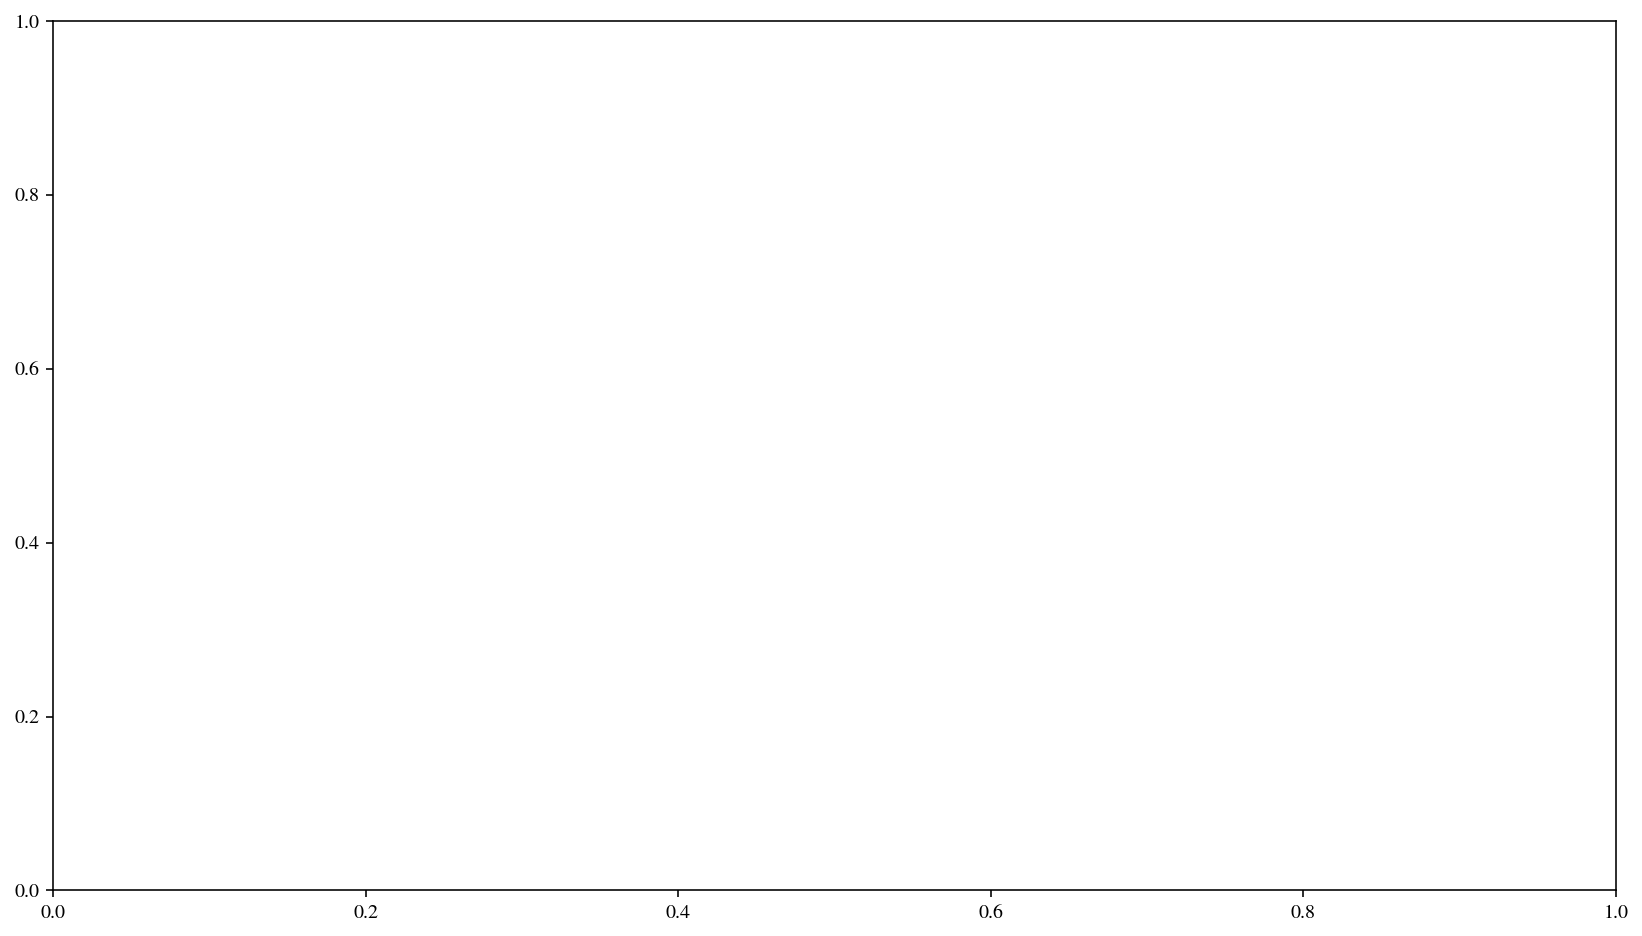

In [77]:
bins=np.linspace(-1e4,1e4,100)

fig=plt.figure(figsize=(14,8));
ax=fig.add_subplot(111)
GausLines = dict()
Sigmas,Sigmas_err = [],[]
for attenuation in [laser_attenuation_arr[5]]:     # 20 dB file is bad
    if attenuation==15:
        datalabel = '%.1f dB (Oct-15)'%attenuation
    else:
        datalabel = '%.1f dB (Oct-22)'%attenuation
    LaserEvents = LaserEventsDict[attenuation]
    dt = LaserEvents.mean_dt_all - np.median(LaserEvents.mean_dt_all)
    # omit outliers    
    dt = dt[(dt>-1e4) & (dt<1e4)]
    print 'np.min(LaserEvents.mean_dt_all),np.max(LaserEvents.mean_dt_all):',np.min(LaserEvents.mean_dt_all),np.max(LaserEvents.mean_dt_all),'len(LaserEvents):',len(LaserEvents),',len(dt):',len(dt)

    if len(dt)>1:
        # fit to Gaussian
        (mu, sigma) = norm.fit(dt[abs(dt-np.median(dt))<500])        
        print 'mu, sigma:',mu, sigma
        # add a 'best fit' line
        x_fit = np.linspace(np.min(bins),np.max(bins),1000)
        y_fit = mlab.normpdf( x_fit, mu, sigma)
        histo,histbins,patches = plt.hist( dt, bins=bins, 
                                          normed=1, edgecolor='black', label=datalabel + ', $\sigma$=%.1f ps'%(sigma));
        GausLines[attenuation] = plt.plot(x_fit, y_fit, '--r', linewidth=2,label=None)
        Sigmas.append(sigma)
        Sigmas_err.append(0.05*sigma) # conservatively estimate 5% uncertainty since at this point I don't know otherwise
    else:
        Sigmas.append(np.nan)
        Sigmas_err.append(np.nan)
    
    # cosmetics
    set_axes(ax=ax,x_label='$t_{left} - t_{right}$ [ps]',y_label='frequency',
             title='varying laser intensity - Gaussian fit to $<t_R-t_L>$',
             fontsize=17,do_add_grid=True,do_add_legend=True);
plt.tight_layout()
print 'attenuation:',laser_attenuation_arr
print 'Sigmas:',Sigmas

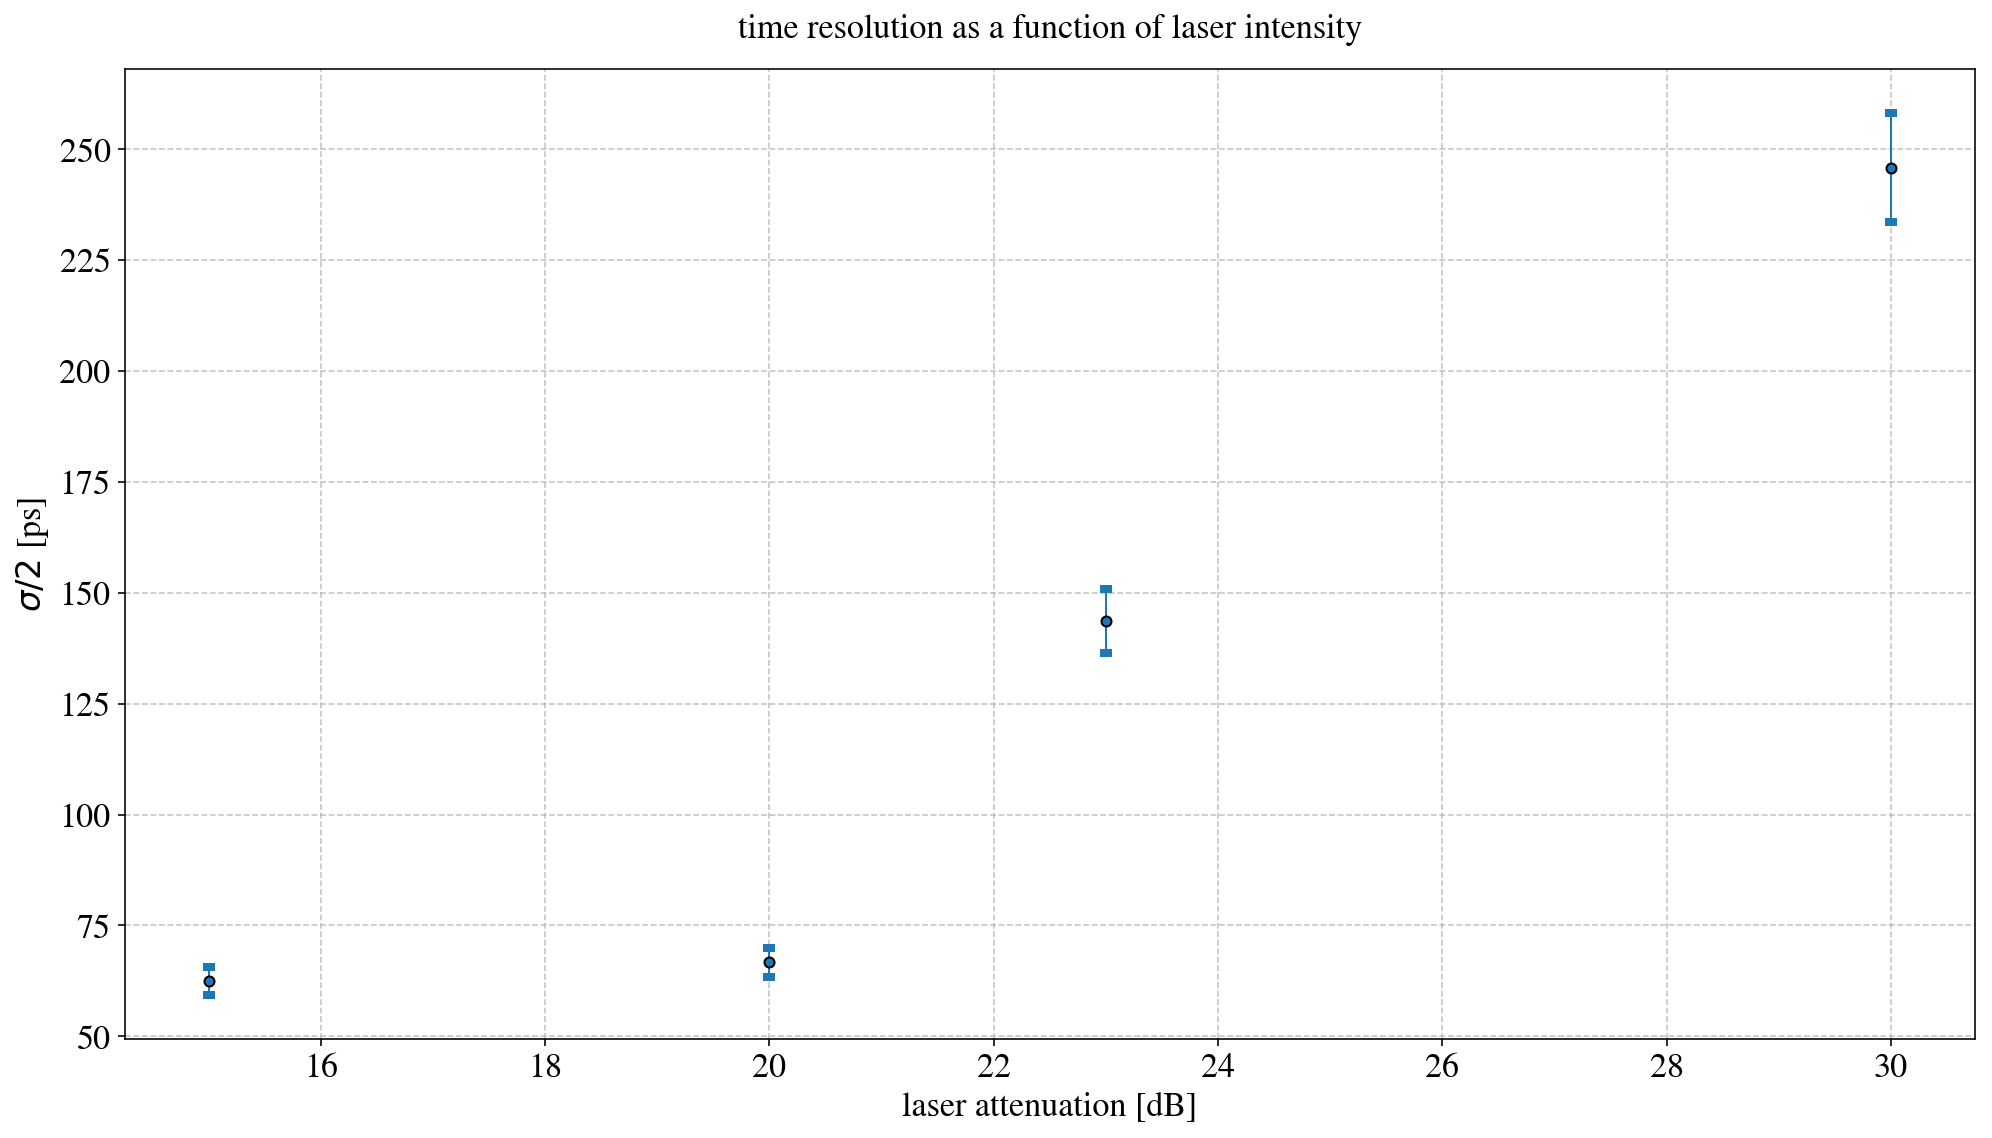

In [60]:
fig=plt.figure(figsize=(14,8));
ax=fig.add_subplot(111)

plt.errorbar(np.array(laser_attenuation_arr),
             0.5*np.array(Sigmas),0.5*np.array(Sigmas_err),
             markeredgecolor='black',markersize=5,marker='o',linestyle='None',linewidth=1,capthick=4,capsize=3,label='Oct-15');

set_axes(ax=ax,x_label='laser attenuation [dB]',y_label='$\sigma/2$ [ps]',
             title='time resolution as a function of laser intensity',
             fontsize=17,do_add_grid=True,do_add_legend=False);
plt.tight_layout()

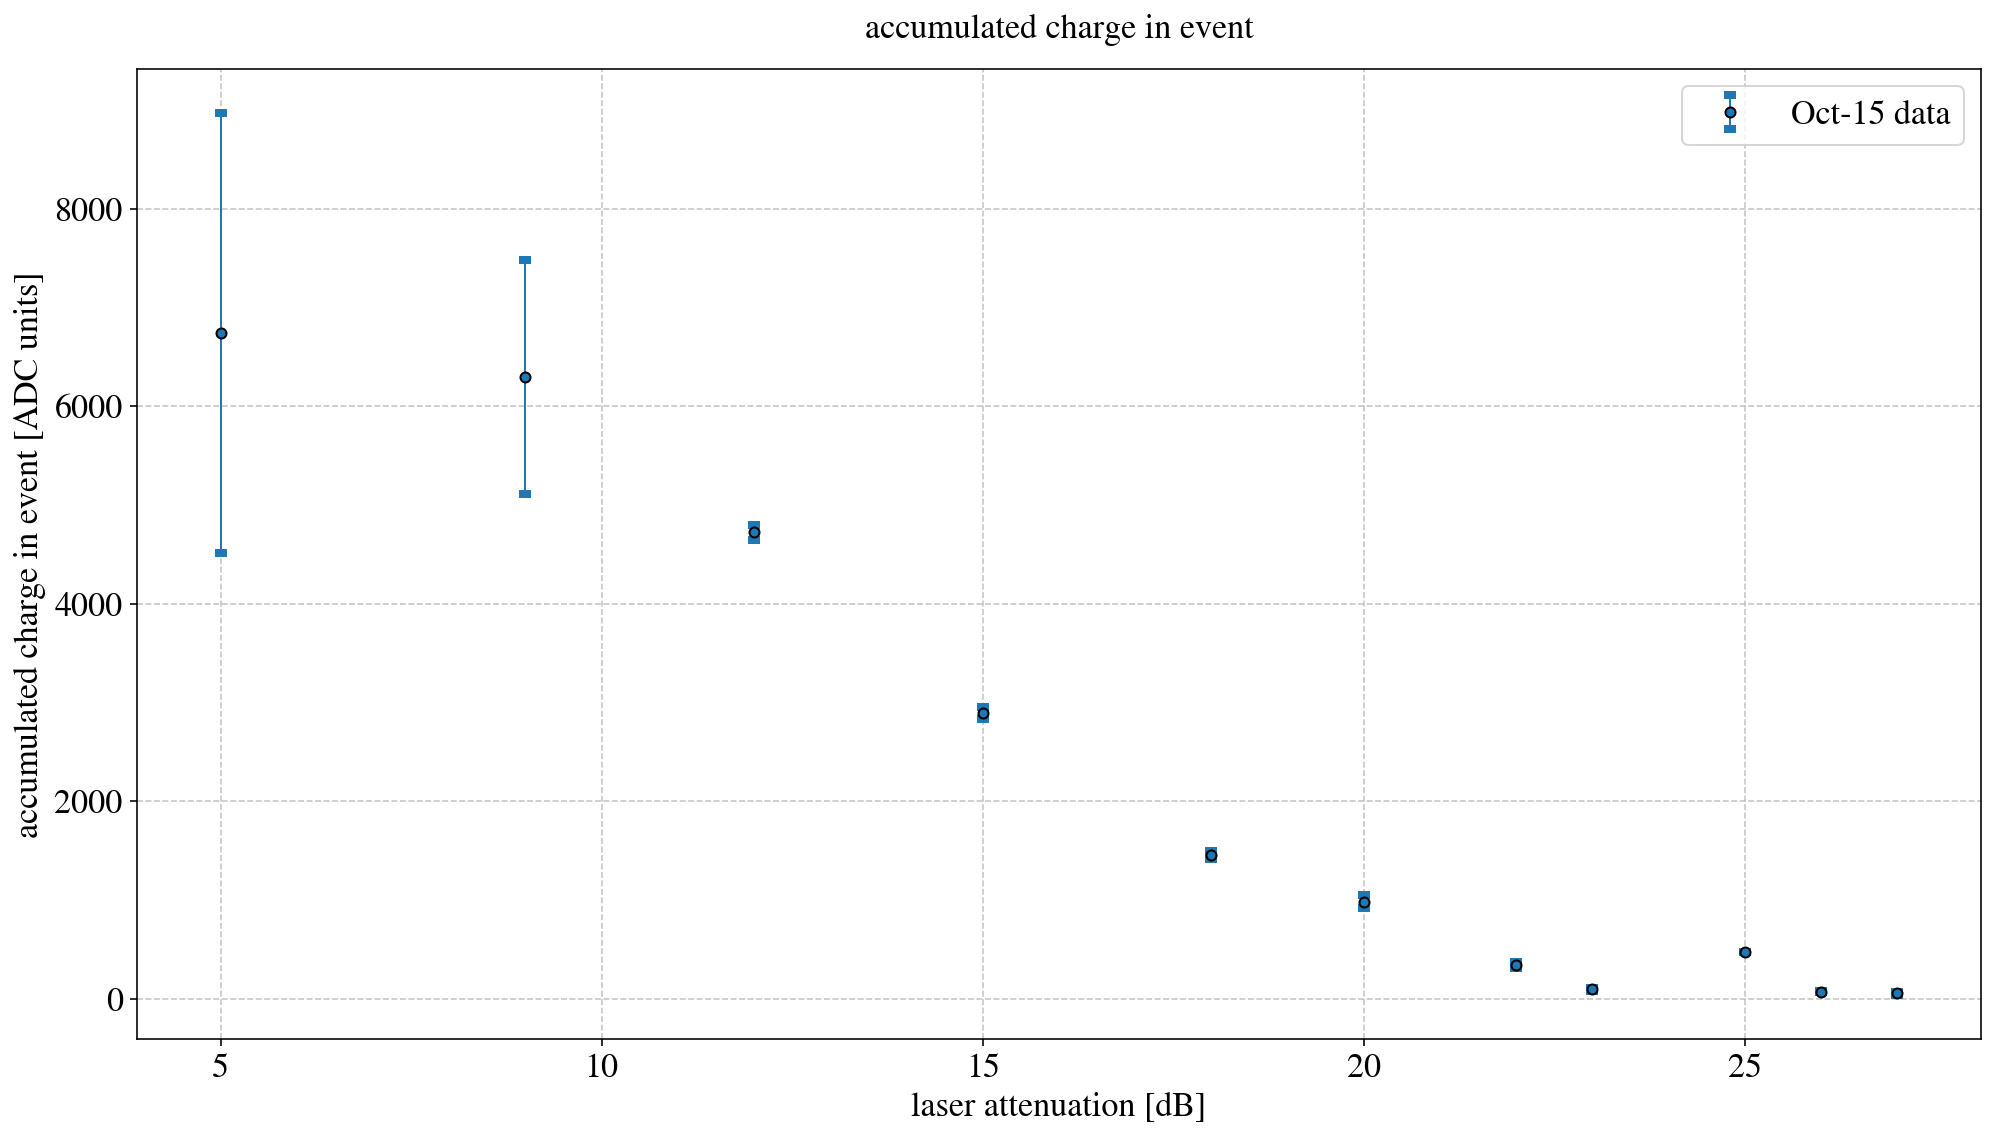

In [19]:
Qtot,Qtot_err = [],[]
for attenuation in laser_attenuation_arr: 
    datalabel = '%.1f dB attenuation'%attenuation
    LaserEvents = LaserEventsDict[attenuation]
    Qtot.append( np.mean(LaserEvents.Qtotal) )
    Qtot_err.append( np.std(LaserEvents.Qtotal) )
fig=plt.figure(figsize=(14,8));
ax=fig.add_subplot(111)
plt.errorbar(np.array(laser_attenuation_arr),np.array(Qtot)*MechanicalFuckupFactor,np.array(Qtot_err)*MechanicalFuckupFactor,
             markeredgecolor='black',markersize=5,marker='o',linestyle='None',linewidth=1,capthick=4,capsize=3,
             label='Oct-15 data');

set_axes(ax=ax,x_label='laser attenuation [dB]',y_label='accumulated charge in event [ADC units]',
             title='accumulated charge in event',
             fontsize=17,do_add_grid=True,do_add_legend=True);
plt.tight_layout()

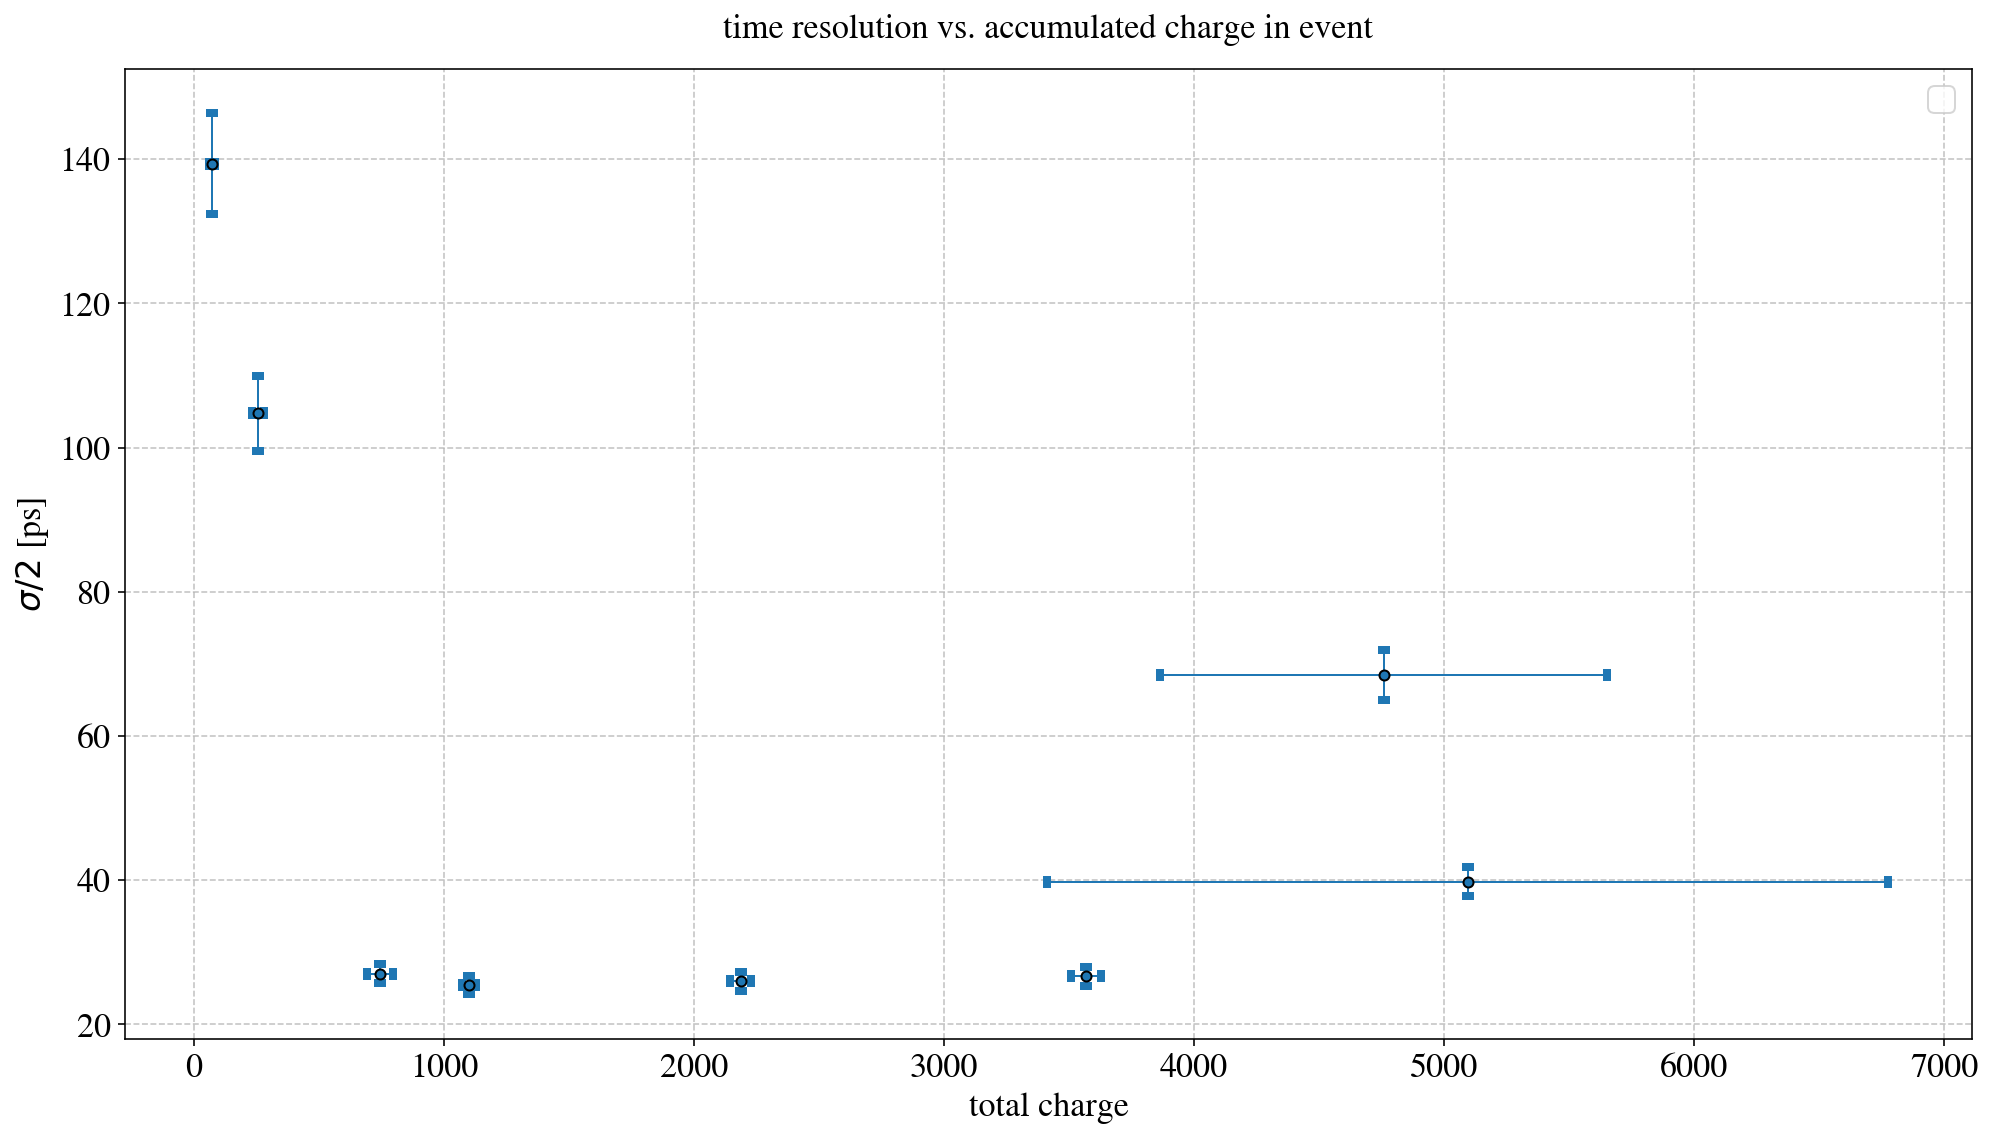

In [22]:

fig=plt.figure(figsize=(14,8));
ax=fig.add_subplot(111)
plt.errorbar(x=np.array(Qtot),y=0.5*np.array(Sigmas),xerr=np.array(Qtot_err),yerr=0.5*np.array(Sigmas_err),
             markeredgecolor='black',markersize=5,marker='o',linestyle='None',linewidth=1,capthick=4,capsize=3,);
set_axes(ax=ax,x_label='total charge',y_label='$\sigma/2$ [ps]',
             title='time resolution vs. accumulated charge in event',
             fontsize=17,do_add_grid=True,do_add_legend=True);
plt.tight_layout()

## save to output file

In [23]:
data_path = '/Users/erezcohen/Desktop/data/PETsys/DuSi/summaryFiles/'
for attenuation in laser_attenuation_arr: 
    datename = '5Nov2020' # = '29Oct2020'
    filename = data_path + datename + '_attenuation_%.1fdB'%attenuation
    LaserEvents = LaserEventsDict[attenuation]
    LaserEvents.to_csv(filename)
print 'done'

done


## arxiv

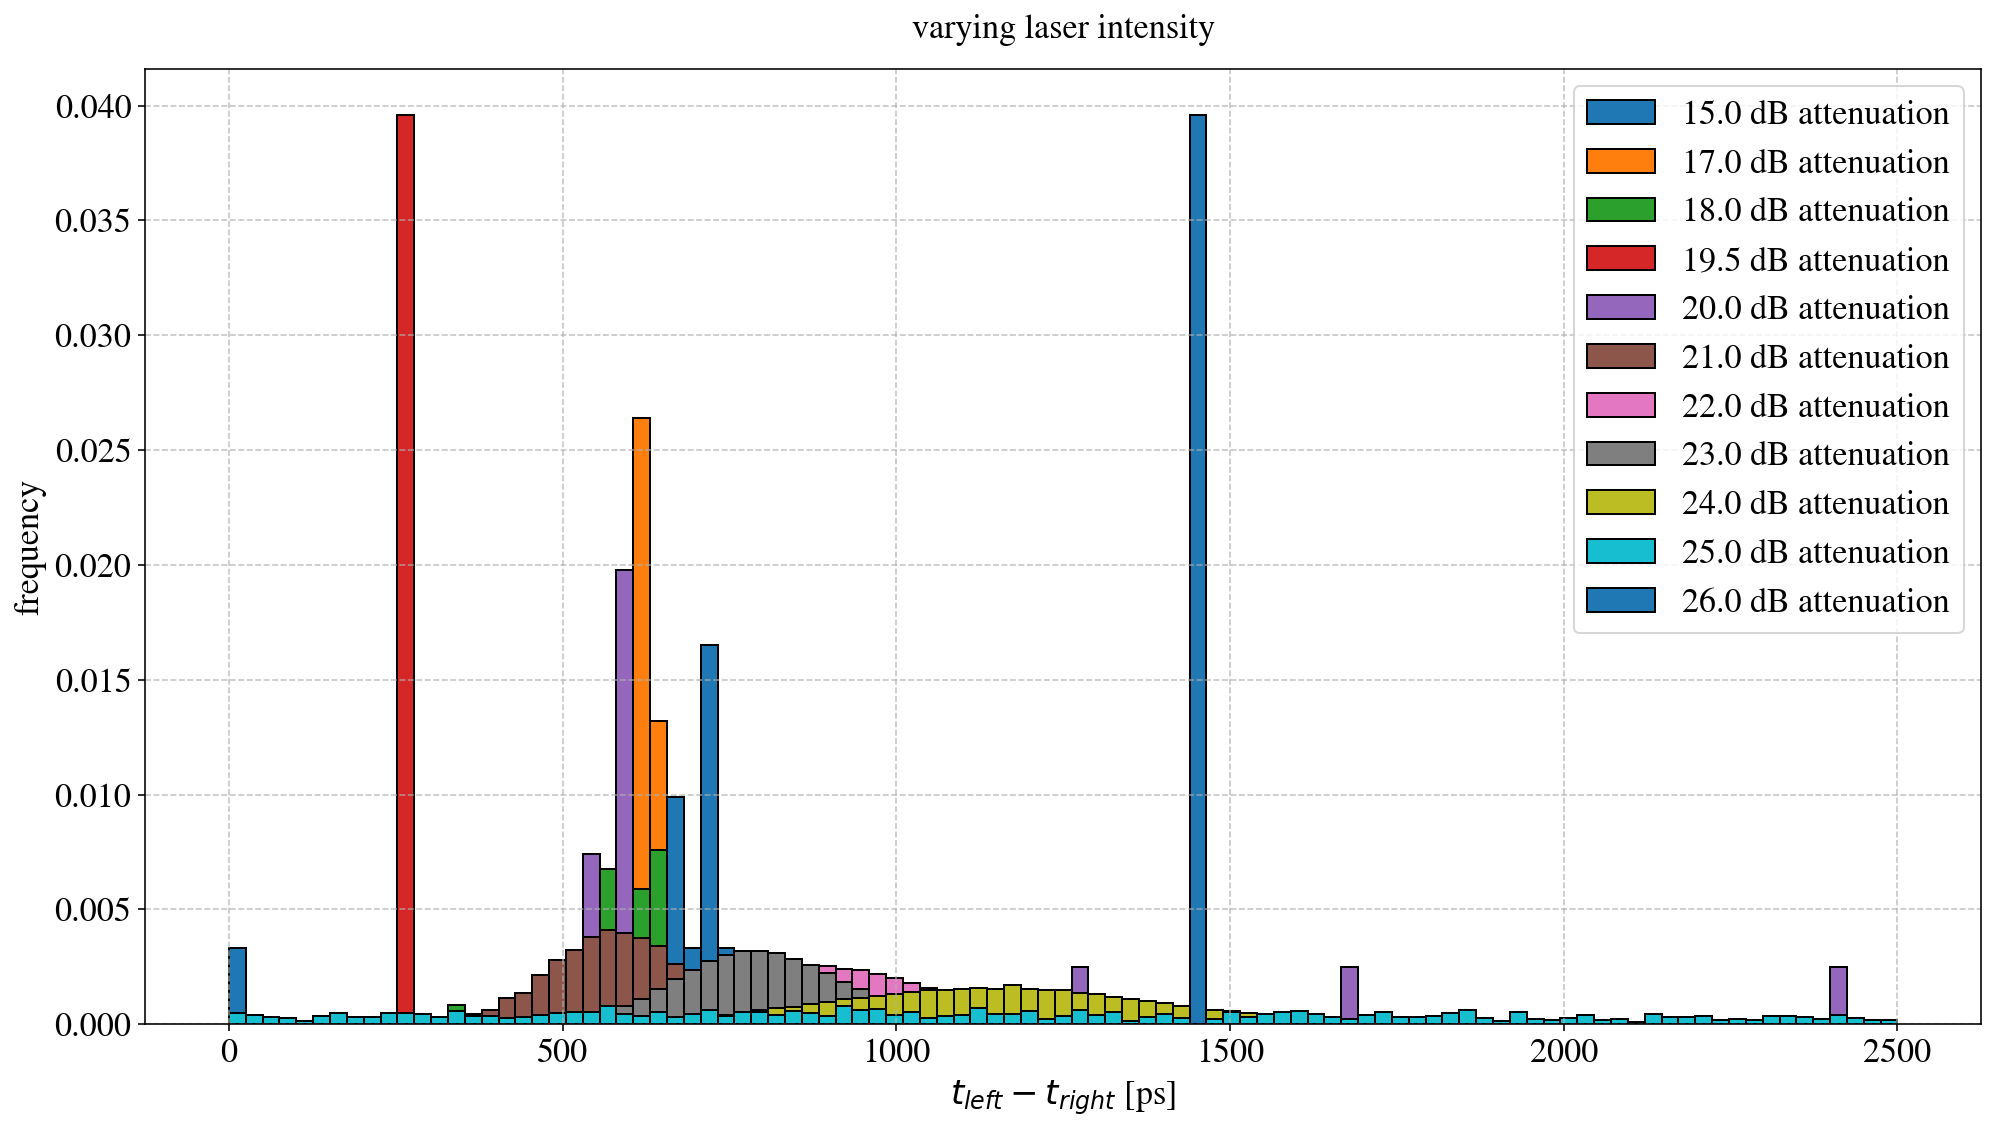

In [55]:
fig=plt.figure(figsize=(14,8));
ax=fig.add_subplot(111)
for attenuation in laser_attenuation_arr: 
    datalabel = '%.1f dB attenuation'%attenuation
    LaserEvents = LaserEventsDict[attenuation]
    dt = LaserEvents.mean_dt_all
    
    histo,histbins,patches = plt.hist( dt, bins=np.linspace(0,2500,100) , 
                                      normed=1, edgecolor='black', label=datalabel );
    
#     # fit to Gaussian
#     (mu, sigma) = norm.fit(dt[abs(dt-np.mean(dt))<300])
#     # add a 'best fit' line
#     x_fit = np.linspace(-300,1500,1000)
#     y_fit = mlab.normpdf( x_fit, mu, sigma)
#     l = plt.plot(x_fit, y_fit, 'r--', linewidth=2,label='Gaussian, $\sigma$=%.1f ps'%(sigma))

    # cosmetics
    set_axes(ax=ax,x_label='$t_{left} - t_{right}$ [ps]',y_label='frequency',
             title='varying laser intensity',
             fontsize=17,do_add_grid=True,do_add_legend=True);
plt.tight_layout()

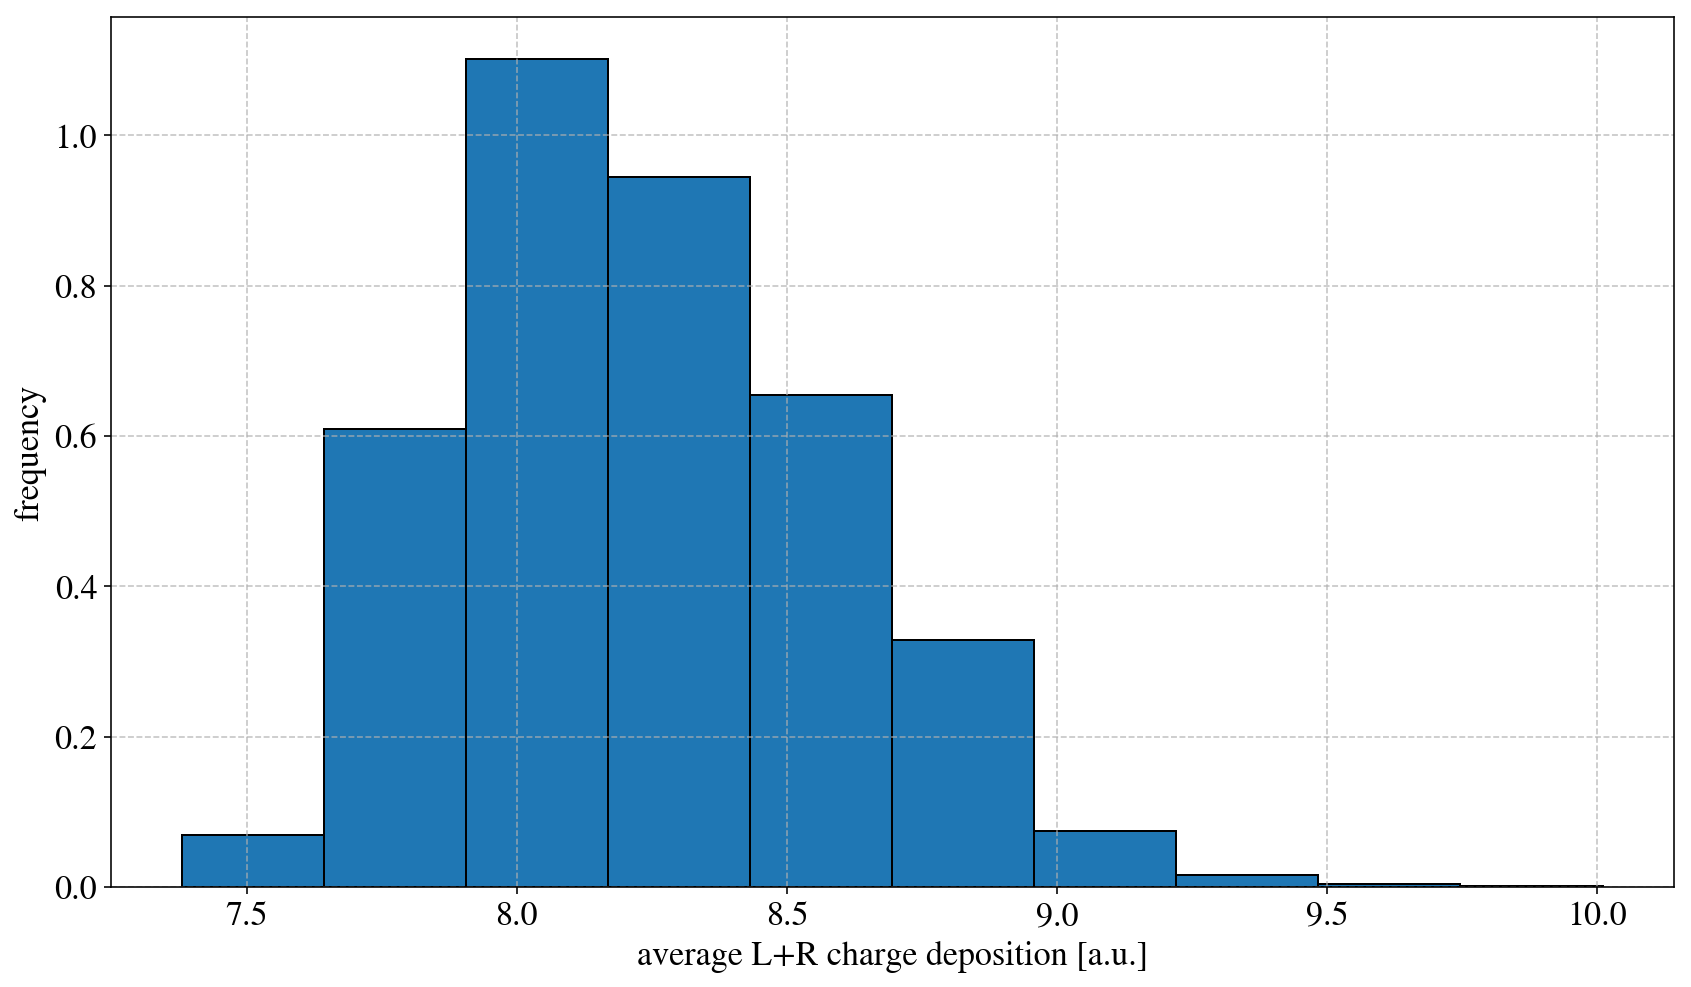

In [35]:
fig,ax=plt.subplots(figsize=(14,8));
histo,bins,patches = plt.hist(LaserEvents.Qavg, 
                              normed=1, edgecolor='black');

set_axes(ax=ax,x_label='average L+R charge deposition [a.u.]',y_label='frequency',#          title='mean=%.1f, std=%.1f ps'%(mean_dt,std_dt),xlim=(-500,500),
         fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='upper left');